In [34]:
import google.datalab.bigquery as bq
import seaborn as sns
import numpy as np

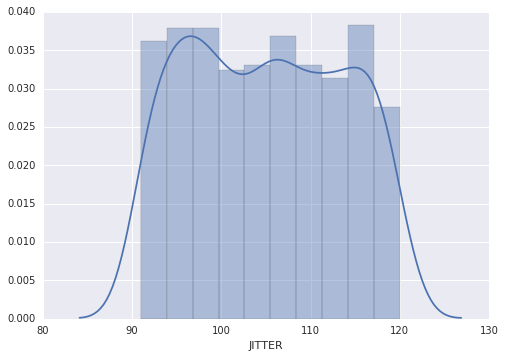

In [70]:
sql = """
SELECT
  CAST(90.5 + RAND()*30 AS INT64) AS JITTER
FROM
  `bigquery-public-data.noaa_gsod.gsod2011`
LIMIT
  1000
"""
df = bq.Query(sql).execute().result().to_dataframe()
sns.distplot(df['JITTER'], kde=True);

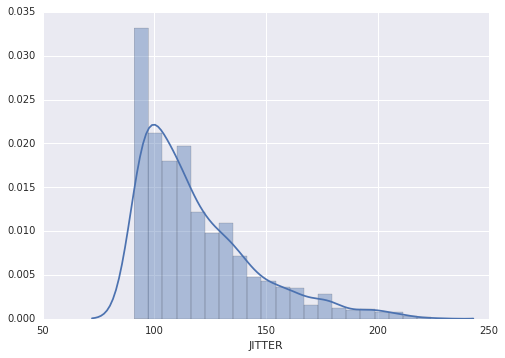

In [72]:
sql = """
SELECT
  CAST(-LN(RAND()*0.99 + 0.01)*30 + 90.5 AS INT64) AS JITTER
FROM
  `bigquery-public-data.noaa_gsod.gsod2011`
LIMIT
  1000
"""
df = bq.Query(sql).execute().result().to_dataframe()
sns.distplot(df['JITTER'], kde=True);

 CREATE TEMPORARY FUNCTION trunc_rand_normal(x FLOAT64, mu FLOAT64, sigma FLOAT64) RETURNS FLOAT64 LANGUAGE js AS "     var u = 1 - Math.random();     var v = 1 - Math.random();     var f = Math.sqrt(-2 * Math.log(u)) * Math.cos(2*Math.PI*v);     f = f * sigma + mu;     if (f < 0)        return 0;     else        return f; "; SELECT   trunc_rand_normal(TEMP, 90, 15) AS JITTER FROM   `bigquery-public-data.noaa_gsod.gsod2011` LIMIT   1000 


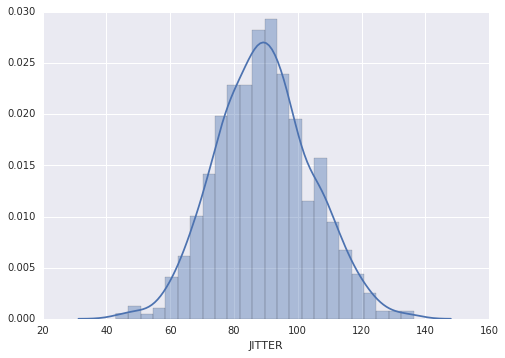

In [75]:
js = """
    var u = 1 - Math.random();
    var v = 1 - Math.random();
    var f = Math.sqrt(-2 * Math.log(u)) * Math.cos(2*Math.PI*v);
    f = f * sigma + mu;
    if (f < 0)
       return 0;
    else
       return f;
""".replace('\n', ' ')
sql = """
CREATE TEMPORARY FUNCTION trunc_rand_normal(x FLOAT64, mu FLOAT64, sigma FLOAT64)
RETURNS FLOAT64
LANGUAGE js AS "{}";
SELECT
  trunc_rand_normal(TEMP, 90, 15) AS JITTER
FROM
  `bigquery-public-data.noaa_gsod.gsod2011`
LIMIT
  1000
""".format(js).replace('\n', ' ')

print sql
df = bq.Query(sql).execute().result().to_dataframe()
sns.distplot(df['JITTER'], kde=True);